# Music of the spheres
## General Physics Group Project

General imports

In [29]:
#Requires midiutil (saving) and pygame (playing) packages, available from pip
import numpy as np
from midiutil.MidiFile import MIDIFile
import matplotlib.pyplot as plt
import pygame
import pygame.mixer
from time import sleep

Planet class definition

In [30]:
Mkm_to_AU= 0.00668458712
def dist_from_point(x1,y1,x0,y0):
   return np.sqrt((x0-x1)**2+(y0-y1)**2)

class Planet:
    def __init__(self, name,orbital_data):
        self.name = name
        self.semi_major_axis = orbital_data[0]*Mkm_to_AU
        self.semi_minor_axis = (orbital_data[0])*np.sqrt(1-orbital_data[1]**2)*Mkm_to_AU
        self.eccentricity = orbital_data[1]
        self.period = orbital_data[2]
    
    def plot_ellipse(self):
        x0 = self.semi_major_axis*self.eccentricity #Position of focus (sun)
        y0 = 0
        N = int(self.period) -1
        t = np.linspace(0, 2*np.pi, N)
        x_range = x0+self.semi_major_axis*np.cos(t)
        y_range = y0+self.semi_minor_axis*np.sin(t)
        return x_range,y_range
    
    def plot_distance(self):
        x0 = self.semi_major_axis*self.eccentricity #Position of focus (sun)
        y0 = 0
        N = int(self.period) -1
        t = np.linspace(0, 2*np.pi, N)
        x_range = self.semi_major_axis*np.cos(t) #x0+self.semi_major_axis*np.cos(t)
        y_range = self.semi_minor_axis*np.sin(t)
        t_range = (t/(np.pi*2))*self.period
        return t_range, dist_from_point(x_range,y_range,x0,y0)
     
    def get_min_max_distance_from_sun(self):
        dist_array = self.plot_distance()[1]
        min_dist = np.min(dist_array)
        max_dist = np.max(dist_array)
        return min_dist,max_dist
    
    def get_peri_aphelion(self):
        perihelion = self.semi_major_axis*(1-self.eccentricity)
        aphelion = self.semi_major_axis*(1+self.eccentricity)
        return perihelion,aphelion


Initialise planet data

In [31]:
#data from https://nssdc.gsfc.nasa.gov/planetary/factsheet/mercuryfact.html
# [semi-major axis (x10^6 km), eccentricity, period (days)]
mercury_data = [57.909, 0.2056, 87.969]
venus_data = [108.210, 0.0068, 224.701]
mars_data = [227.956, 0.0935, 686.980]
earth_data = [149.598, 0.0167, 365.256] 
jupiter_data = [778.479, 0.0487, 4332.589]
saturn_data = [1432.041, 0.0520, 10759.22]
uranus_data = [2867.043, 0.0469, 30685.4]
neptune_data = [4514.953, 0.0097, 60189]
pluto_data = [5869.656, 0.2444, 90560]

Mercury = Planet("Mercury",mercury_data)
Venus = Planet("Venus",venus_data)
Earth = Planet("Earth",earth_data)
Mars = Planet("Mars",saturn_data)
Jupiter = Planet("Jupiter",jupiter_data)
Saturn = Planet("Saturn",saturn_data)
Uranus = Planet("Uranus",uranus_data)
Neptune = Planet("Neptune",neptune_data)
Pluto = Planet("Pluto",pluto_data)

Planets = [Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, Neptune, Pluto]

Plot orbit of planets

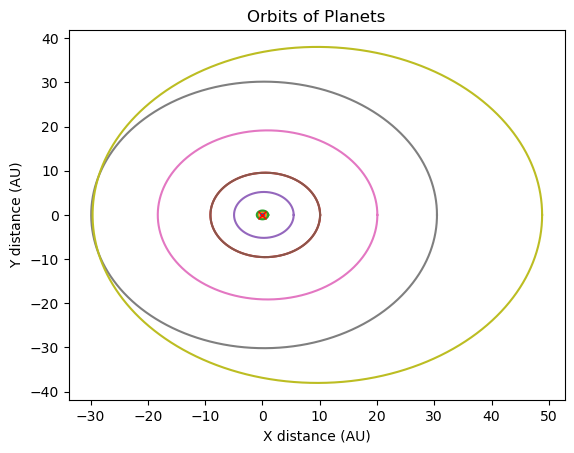

In [37]:
x_total = [] #np.empty((len(Planets)))
y_total = [] #np.empty((len(Planets)))
t_total = [] #np.empty((len(Planets)))
dist_total = [] #np.empty((len(Planets)))
 
#plt.axes().set_aspect('equal')
for i,planet in enumerate(Planets):
    x,y = planet.plot_ellipse()
    x_total.append(x)
    y_total.append(y)
    plt.plot(x,y)
plt.plot(0,0,"rx")
plt.title("Orbits of Planets")
plt.xlabel("X distance (AU)")
plt.ylabel("Y distance (AU)")
plt.show()



Plot planet-sun distance over time

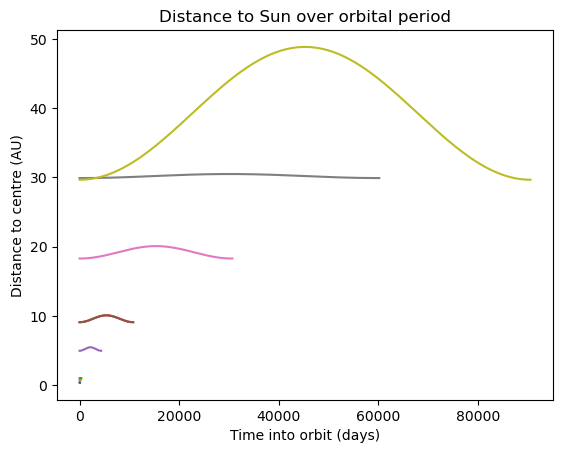

In [38]:
for i,planet in enumerate(Planets):
    t,d = planet.plot_distance()
    t_total.append(t)
    dist_total.append(d)
    plt.plot(t,d)
    
plt.title("Distance to Sun over orbital period")
plt.xlabel("Time into orbit (days)")
plt.ylabel("Distance to centre (AU)")
plt.show()

Min and max distance to sun from planet's orbit

In [40]:
#Note - this should give the same values as perihelion and aphelion
for i,planet in enumerate(Planets):
    name = planet.name
    min_dist = np.min(dist_total[i])
    max_dist = np.max(dist_total[i])
    print(f"{planet.name}: Min distance: {min_dist:3.2f} AU. Max distance: {max_dist:3.2f} AU.")

Mercury: Min distance: 0.31 AU. Max distance: 0.47 AU.
Venus: Min distance: 0.72 AU. Max distance: 0.73 AU.
Earth: Min distance: 0.98 AU. Max distance: 1.02 AU.
Mars: Min distance: 9.07 AU. Max distance: 10.07 AU.
Jupiter: Min distance: 4.95 AU. Max distance: 5.46 AU.
Saturn: Min distance: 9.07 AU. Max distance: 10.07 AU.
Uranus: Min distance: 18.27 AU. Max distance: 20.06 AU.
Neptune: Min distance: 29.89 AU. Max distance: 30.47 AU.
Pluto: Min distance: 29.65 AU. Max distance: 48.83 AU.


Min and max distance to sun from planet's orbit (using parameters of ellipse to calculate focus)

In [41]:
for i,planet in enumerate(Planets):
    name = planet.name
    min_dist,max_dist = planet.get_peri_aphelion()
    print(f"{planet.name}: Perihelion: {min_dist:3.2f} AU. Aphelion: {max_dist:3.2f} AU.")

Mercury: Perihelion: 0.31 AU. Aphelion: 0.47 AU.
Venus: Perihelion: 0.72 AU. Aphelion: 0.73 AU.
Earth: Perihelion: 0.98 AU. Aphelion: 1.02 AU.
Mars: Perihelion: 9.07 AU. Aphelion: 10.07 AU.
Jupiter: Perihelion: 4.95 AU. Aphelion: 5.46 AU.
Saturn: Perihelion: 9.07 AU. Aphelion: 10.07 AU.
Uranus: Perihelion: 18.27 AU. Aphelion: 20.06 AU.
Neptune: Perihelion: 29.89 AU. Aphelion: 30.47 AU.
Pluto: Perihelion: 29.65 AU. Aphelion: 48.83 AU.


Converting distance to frequency to a note

In [42]:
T = 1000 # Tension
mu = 0.001 # Linear density

def frequency(distance, n=1):
    return n * np.power(T / mu, 1/2) / (2 * distance)

def freq_to_note(freq):
    notes = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']

    note_number = 12 * np.log2(freq / 440) + 49  
    note_number = round(note_number)
        
    note = (note_number - 1 ) % len(notes)
    note = notes[note]
    
    octave = (note_number + 8 ) // len(notes)
    
    return note, octave

def midi_pitch_number(freq):
    m  =  12 * np.log2(freq/440) + 69
    return m

Plotting range of frequencies achieved by each planet over its orbit

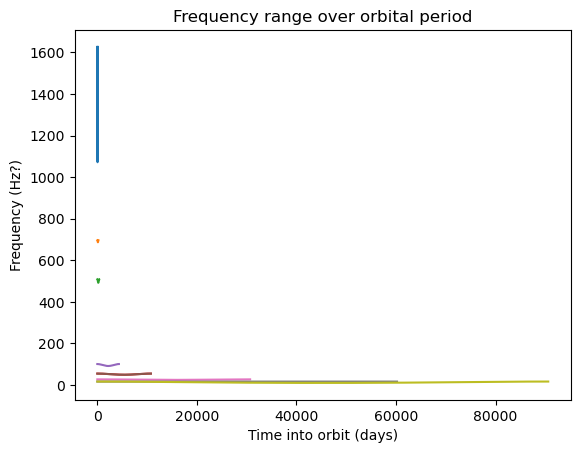

In [44]:
freq_total = []
for i,planet in enumerate(Planets):
    f = frequency(dist_total[i])
    freq_total.append(f)
    plt.plot(t_total[i],f)
    
plt.title("Frequency range over orbital period")
plt.xlabel("Time into orbit (days)")
plt.ylabel("Frequency (Hz?)")
plt.show()

Display min and max frequencies as notes

In [45]:
min_notes = []
max_notes = []

def get_notes_properties(freq):
    midi = midi_pitch_number(freq)
    note, octave = freq_to_note(freq)
    return freq, note, octave, midi

def display_notes(notes):
    for i,planet in enumerate(Planets):
        print(f"{planet.name}: Note: {notes[i][1]}, Octave: {notes[i][2]}")

for planet in Planets:
    min_freq = frequency(planet.get_peri_aphelion()[0]) #min distance
    max_freq = frequency(planet.get_peri_aphelion()[1]) #min distance
    min_notes.append(get_notes_properties(min_freq))
    max_notes.append(get_notes_properties(max_freq))

print("Notes at minimum planet-sun distance")
display_notes(min_notes)

print("\nNotes at maximum planet-sun distance")
display_notes(max_notes)

Notes at minimum planet-sun distance
Mercury: Note: G#, Octave: 6
Venus: Note: F, Octave: 5
Earth: Note: C, Octave: 5
Mars: Note: A, Octave: 1
Jupiter: Note: G#, Octave: 2
Saturn: Note: A, Octave: 1
Uranus: Note: A, Octave: 0
Neptune: Note: C, Octave: 0
Pluto: Note: C#, Octave: 0

Notes at maximum planet-sun distance
Mercury: Note: C, Octave: 6
Venus: Note: F, Octave: 5
Earth: Note: B, Octave: 4
Mars: Note: G, Octave: 1
Jupiter: Note: F#, Octave: 2
Saturn: Note: G, Octave: 1
Uranus: Note: G, Octave: 0
Neptune: Note: C, Octave: 0
Pluto: Note: E, Octave: -1


Code to make a MIDI file

In [46]:
def create_midi_file(notes,midi_path):
    mf = MIDIFile(1)     # only 1 track
    track = 0   # the only track

    time = 0    # start at the beginning
    mf.addTrackName(track, time, "Sample Track")
    mf.addTempo(track, time, 120)

    # add some notes
    channel = 0
    volume = 100

    for _, _, _, midi in notes:
        
        pitch = round(midi) 
        time = 0 
        duration = 3 
        mf.addNote(track, channel, pitch, time, duration, volume)

    with open(midi_path, 'wb') as outf:
        mf.writeFile(outf)

create_midi_file(min_notes,"min_chord.midi")
create_midi_file(max_notes,"max_chord.midi")


Code to play a midi file, plays min and max chord

In [ ]:
def play_chord(midi_path):
    pygame.init()
    pygame.mixer.init()
    pygame.mixer.music.load(midi_path)
    pygame.mixer.music.play()
    while pygame.mixer.music.get_busy():
        sleep(1)

play_chord("min_chord.midi")
play_chord("max_chord.midi")

Plays the first 30 days of chords

In [52]:
def write_track():
    mf = MIDIFile(1)     # only 1 track
    track = 0   # the only track
    time=0
    mf.addTrackName(track, time, "Sample Track")
    mf.addTempo(track, time, 120)
    # add some notes
    channel = 0
    volume = 100

    for day in range(0,30): #Note - not actually days as every planet has its period split into 100 steps
        day_notes = []
        for i in range(0,len(Planets)):
            day_freq = frequency(dist_total[i][day]) #Distance at time "day"
            day_notes.append(get_notes_properties(day_freq))

        for _, _, _, midi in day_notes:
        
            pitch = round(midi) 
            time = day +.5
            duration = 1
            mf.addNote(track, channel, pitch, time, duration, volume)
    
    with open("thirty_days.midi", 'wb') as outf:
        mf.writeFile(outf)

write_track()
play_chord("thirty_days.midi")

In [63]:
def create_midi_file_arpeggio(notes,midi_path):
    mf = MIDIFile(1)     # only 1 track
    track = 0   # the only track
    notes = np.sort(notes,axis=0)
    time = 0    # start at the beginning
    mf.addTrackName(track, time, "Sample Track")
    mf.addTempo(track, time, 120)

    # add some notes
    channel = 0
    volume = 100
    time = 0
    for _, _, _, midi in notes:
        
        pitch = round(midi.astype('float'))
        
        duration = 1 
        mf.addNote(track, channel, pitch, time, duration, volume)
        time +=1

    with open(midi_path, 'wb') as outf:
        mf.writeFile(outf)

create_midi_file_arpeggio(min_notes,"min_chord_arpeggio.midi")
play_chord("min_chord_arpeggio.midi")